<a href="https://colab.research.google.com/github/Anoziqq/NN/blob/main/Lab5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 5
#З дисципліни "Нейронні мережі"
##Виконав студент:
###групи АнД-31
###Лаврій Руслан

## Завдання
## 1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101
## 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.
## i1=5, i2=35, i3=65


In [3]:
import tarfile
import os
import shutil
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt

In [4]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
file = tarfile.open("food-101.tar.gz")
file.extractall()
file.close()
!ls food-101

--2022-06-06 12:00:41--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-06-06 12:00:41--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  29.4MB/s    in 2m 46s  

2022-06-06 12:03:27 (28.7 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]

images	license_agreement.txt  meta  README.txt


## Знаходження класів

In [6]:
file = open('food-101/meta/classes.txt')
line_numbers = [5, 35, 65] 
lines = []
for i, line in enumerate(file):
  if i in line_numbers:
    lines.append(line.strip())
print(lines)

['beet_salad', 'escargots', 'mussels']


## Створення папок і копіювання фото

In [8]:
!mkdir food-101/test
!mkdir food-101/train
!mkdir food-101/test/beet_salad
!mkdir food-101/test/escargots
!mkdir food-101/test/mussels
!mkdir food-101/train/beet_salad
!mkdir food-101/train/escargots
!mkdir food-101/train/mussels

file = open('food-101/meta/train.txt')
for i in file:
  dir = i.split("/")
  if (dir[0] == 'beet_salad'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/beet_salad')
  elif(dir[0] == 'escargots'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/escargots')
  elif(dir[0] == 'mussels'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/mussels')

file = open('food-101/meta/test.txt')
for i in file:
  dir = i.split("/")
  if (dir[0] == 'beet_salad'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/beet_salad')
  elif(dir[0] == 'escargots'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/escargots')
  elif(dir[0] == 'mussels'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/mussels')
!ls food-101/test
test_dir = 'food-101/test'
train_dir = 'food-101/train'
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

mkdir: cannot create directory ‘food-101/test’: File exists
mkdir: cannot create directory ‘food-101/train’: File exists
mkdir: cannot create directory ‘food-101/test/beet_salad’: File exists
mkdir: cannot create directory ‘food-101/test/escargots’: File exists
mkdir: cannot create directory ‘food-101/test/mussels’: File exists
mkdir: cannot create directory ‘food-101/train/beet_salad’: File exists
mkdir: cannot create directory ‘food-101/train/escargots’: File exists
mkdir: cannot create directory ‘food-101/train/mussels’: File exists
beet_salad  escargots  mussels
['beet_salad' 'escargots' 'mussels']


## Перетворення зображень та покращення



In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.



## Навчання мережі

In [10]:
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_model = model.fit(train_data_augmented,
                          epochs=60,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))
model.save('model.hdf5')

Epoch 1/60
71/71 [==============================] - 50s 538ms/step - loss: 1.1151 - accuracy: 0.4480 - val_loss: 0.9543 - val_accuracy: 0.4627
Epoch 2/60
71/71 [==============================] - 35s 490ms/step - loss: 0.9235 - accuracy: 0.5964 - val_loss: 0.8198 - val_accuracy: 0.7000
Epoch 3/60
71/71 [==============================] - 35s 498ms/step - loss: 0.8793 - accuracy: 0.6200 - val_loss: 0.7816 - val_accuracy: 0.7040
Epoch 4/60
71/71 [==============================] - 35s 491ms/step - loss: 0.8442 - accuracy: 0.6436 - val_loss: 0.7879 - val_accuracy: 0.7080
Epoch 5/60
71/71 [==============================] - 35s 494ms/step - loss: 0.8491 - accuracy: 0.6489 - val_loss: 0.7729 - val_accuracy: 0.7000
Epoch 6/60
71/71 [==============================] - 35s 492ms/step - loss: 0.8379 - accuracy: 0.6622 - val_loss: 0.7920 - val_accuracy: 0.6800
Epoch 7/60
71/71 [==============================] - 35s 491ms/step - loss: 0.8246 - accuracy: 0.6649 - val_loss: 0.6897 - val_accuracy: 0.7333

## Графіки

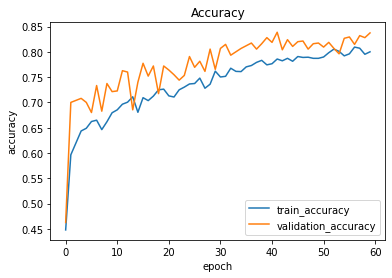

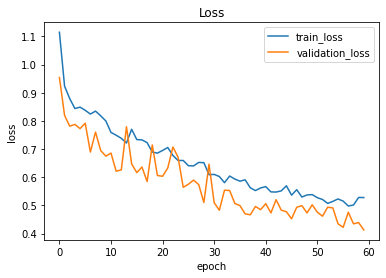

In [11]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()
plot_accuracy(history_model,'Accuracy')
plot_loss(history_model,'Loss')